In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import pandas
from pathlib import Path

In [2]:
workspace = Path("D:/LUNA23-ISMI-Group7/")

test_set_predictions_path = workspace / "results" / "20230527_15_multitask_model" / "fold0" / "test_set_predictions"
test_set_images_path = workspace / "data" / "test_set" / "images"

predictions = pandas.read_csv(test_set_predictions_path / "predictions.csv")

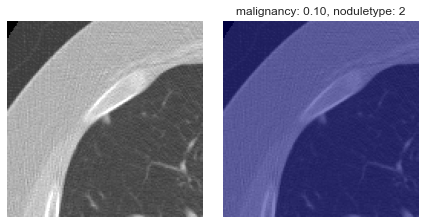

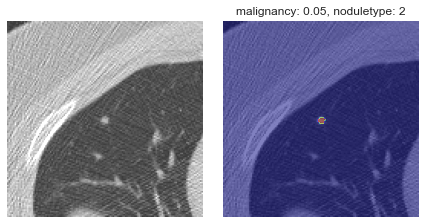

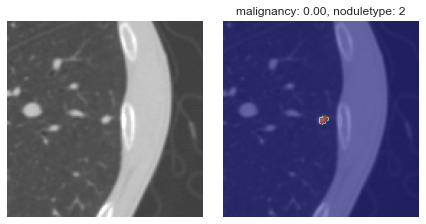

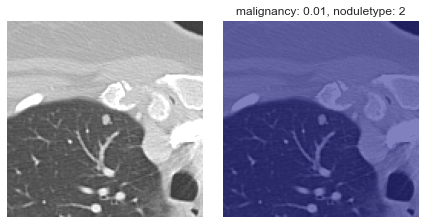

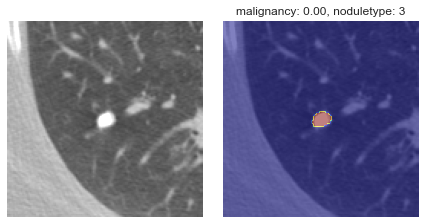

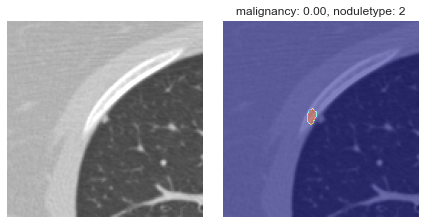

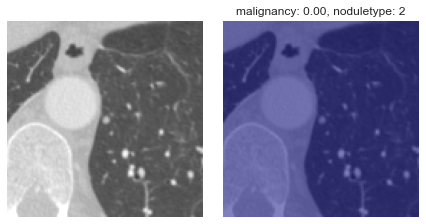

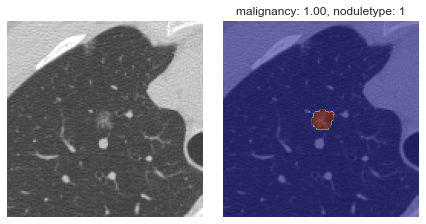

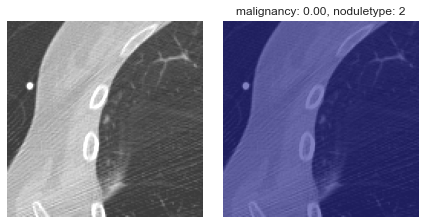

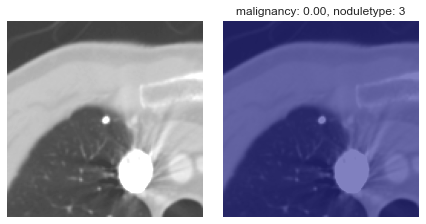

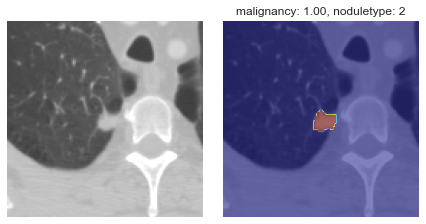

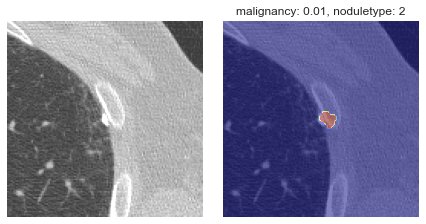

In [3]:
for idx, image_path in enumerate(list(test_set_images_path.glob("*.mha"))):

    noduleid = image_path.stem

    pd = predictions[predictions.noduleid == noduleid].iloc[0]

    image = sitk.ReadImage(str(image_path))
    segmentation = sitk.ReadImage(str(test_set_predictions_path / "segmentations" / f"{noduleid}.mha"))

    fig, ax = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)

    ax[0].imshow(sitk.GetArrayFromImage(image)[32], vmin=-1500, vmax=500, cmap="gray")
    
    ax[1].imshow(sitk.GetArrayFromImage(image)[32], vmin=-1500, vmax=500, cmap="gray")
    ax[1].imshow(sitk.GetArrayFromImage(segmentation)[32], vmin=0, vmax=1, cmap="jet", alpha=0.5)

    ax[1].set_title(f"malignancy: {pd.malignancy:.2f}, noduletype: {pd.noduletype}")

    [a.axis("off") for a in ax]

    # optionally: save these figures to disk and don't plot inline

    if idx > 10: break